# Titanic analisys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load Titanic dataset
filename = '/home/wagner/Desenv/workspace/python/Introducao-Udacity/Aula 04/titanic_data.csv'
titanic_df = pd.read_csv(filename)

In [4]:
titanic_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
#Create a new dataframe with same columns
titanic_clean = titanic_df.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)

In [13]:
titanic_clean.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


## Cleaning data missing

In [61]:
null_columns=titanic_clean.columns[titanic_clean.isnull().any()]
null_columns

Index(['Age'], dtype='object')

In [63]:
len(titanic_clean[titanic_clean['Age'].isnull()])

177

In [34]:
# Verify average Age by Pclass
group_by_pclass = titanic_clean.groupby('Pclass').mean()

In [35]:
group_by_pclass

,PassengerId,Survived,Age
Pclass,,,
1,461.597222,0.629630,38.233441
2,445.956522,0.472826,29.877630
3,439.154786,0.242363,25.140620


In [67]:
# Create a function to help change null value of Age for average Age by Ship Class
def change_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [121]:
titanic_clean['Age'] = titanic_clean[['Age','Pclass']].apply(change_age,axis=1)

In [70]:
titanic_clean.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [79]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [112]:
def change_surviced_label(data):
    if data == 1:
        return 'Yes'
    else:
        return 'No'

In [122]:
# Changing label of Survived
titanic_clean['Survived_New'] = titanic_clean['Survived'].apply(change_surviced_label)

In [123]:
titanic_clean.drop('Survived',axis=1,inplace=True)
titanic_clean['Survived'] = titanic_clean['Survived_New'] 
titanic_clean.drop('Survived_New',axis=1,inplace=True)

In [125]:
titanic_clean.head()

,PassengerId,Pclass,Sex,Age,Survived
0,1,3,male,22.0,No
1,2,1,female,38.0,Yes
2,3,3,female,26.0,Yes
3,4,1,female,35.0,Yes
4,5,3,male,35.0,No


In [93]:
# Grouping data with 'Pclass','Sex' and if 'Survived'
titanic_counter_group = titanic_clean.groupby(['Pclass','Sex','Survived']).count()

In [94]:
titanic_counter_group['Contador'] = titanic_counter_group.drop('Age',axis=1)

In [98]:
titanic_counter_group.drop('PassengerId',axis=1,inplace=True)

In [108]:
"""
In next table show that the most number of victmis 
was Male that traveled in 3ª class
"""
titanic_counter_group

Contador
Pclass Sex    Survived          
1      female 0                3
              1               91
       male   0               77
              1               45
2      female 0                6
              1               70
       male   0               91
              1               17
3      female 0               72
              1               72
       male   0              300
              1               47

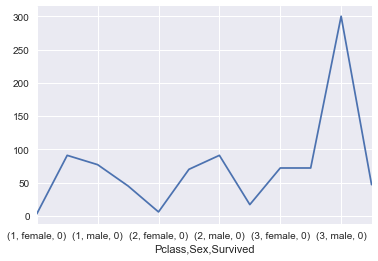

In [109]:
titanic_counter_group['Contador'].plot()

In [134]:
# Show data about maximum number of dead
max_dead = titanic_counter_group['Contador'].max()
titanic_counter_group[titanic_counter_group['Contador'] == max_dead]

,,,Contador
Pclass,Sex,Survived,
3,male,0,300
